# Sharryl Seto 1005523
View Homework below!


# Simple Linear Regression

The goal of this project was to build a linear regression model from the ground up using numpy.

In [3]:
%matplotlib inline

#imports
import numpy as np
import matplotlib.pyplot as plt

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

100


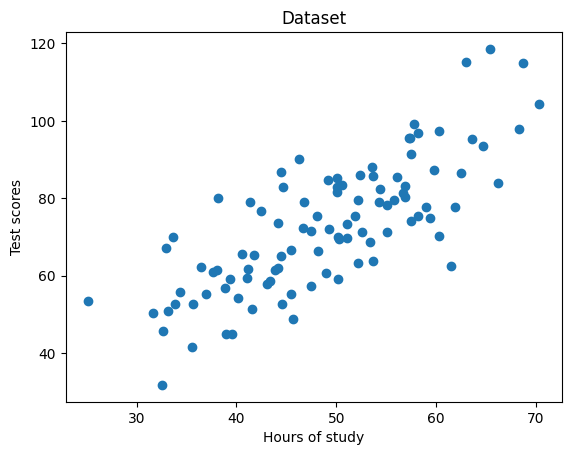

In [5]:
points = np.genfromtxt('data.csv', delimiter=',')
#Extract columns
x = np.array(points[:,0])
y = np.array(points[:,1])
print(len(points))

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

#### Defining the hyperparamters

In [6]:
#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

#### Define cost function

In [7]:
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))

    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2

    #Return average of squared error
    return total_cost/N

#### Define Gradient Descent functions

In [10]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, np.array(points), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))

    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

#### Run gradient_descent_runner() to get optimized parameters b and m

In [11]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.02963934787473239
Optimized m: 1.4774173755483797
Minimized cost: 112.65585181499746


#### Plotting the cost per iterations

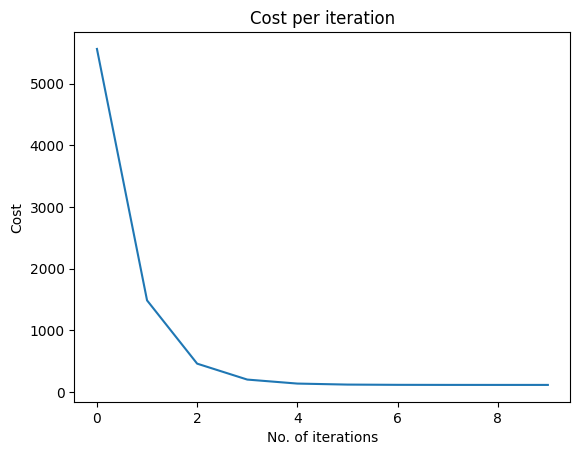

In [12]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Gradient descent converges to local minimum after 5 iterations

#### Plot line of best fit

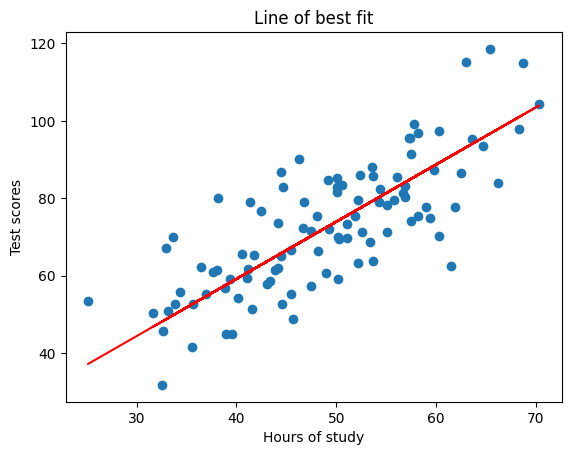

In [13]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

# Homework

You may modify this notebook to submit your answers to the following questions.

Name: Sharryl Seto (1005523)
Class: Cl02

Optimized b: -29270.96969856004
Optimized m: -1489261.2296547089
Minimized cost: 5528980589368753.0


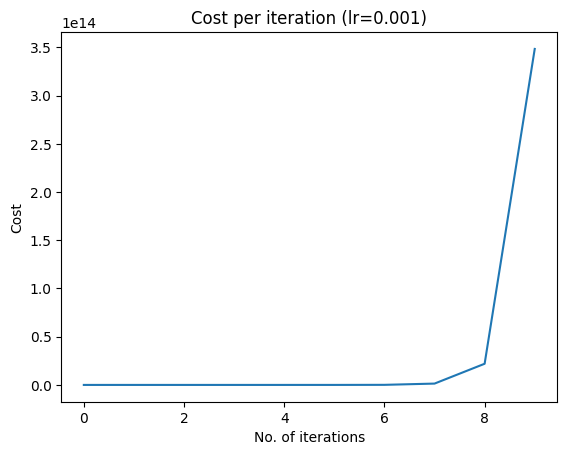

In [14]:
# Q1
#hyperparamters
learning_rate = 0.001
initial_b = 0
initial_m = 0
num_iterations = 10
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))
# Plot cost graph
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration (lr=0.001)')
plt.show()

Optimized b: -1781902740219.794
Optimized m: -90660410246275.94
Minimized cost: 2.048980359894753e+31


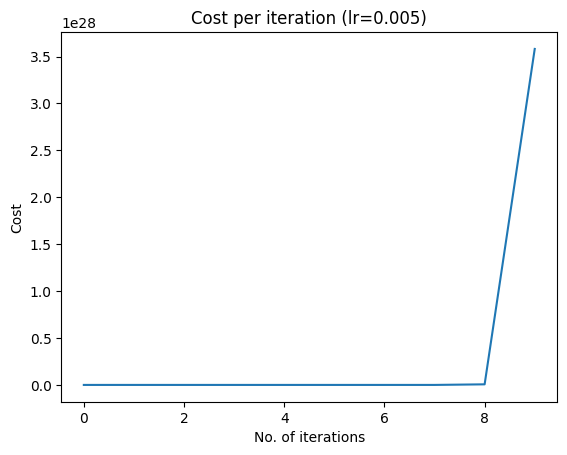

In [15]:
# Q1
#hyperparamters
learning_rate = 0.005
initial_b = 0
initial_m = 0
num_iterations = 10
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))
# Plot cost graph
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration (lr=0.005)')
plt.show()

Optimized b: 0.011694288874113378
Optimized m: 0.5919283357463264
Minimized cost: 2073.937530133058


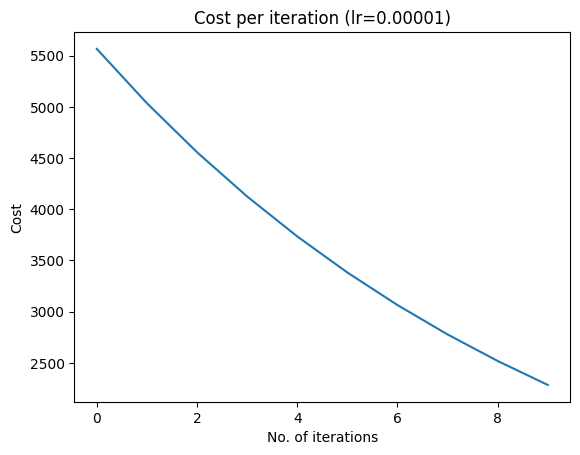

In [16]:
# Q1
#hyperparamters
learning_rate = 0.00001
initial_b = 0
initial_m = 0
num_iterations = 10
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))
# Plot cost graph
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration (lr=0.00001)')
plt.show()

## Question 2:
Modify step_gradient function to implement stochastic gradient descent. Hint: This was explained during the class. Stochasticity in this context means there is a randomness in the order of the inputs i.e., before every iteration of gradient descent, shuffle the inputs. We also update the parameters for each individual input instead of updating them for the whole data at one shot. We do this to prevent over fitting and make the model more generalized.

In [18]:
def sgd_gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        # shuffle points
        np.random.shuffle(points)
        # update params individually instead of whole data
        for i in range(0, len(points)):
            b, m = sgd_step_gradient(b, m, points[i], learning_rate)

    return [b, m, cost_graph]

def sgd_step_gradient(b_current, m_current, point, learning_rate):
    # single point instead of whole array
    x = point[0]
    y = point[1]

    #Calculate Gradient for each point
    for i in range(0, len(points)):
        # remove divide by N as doing for individual points instead of whole data
        m_gradient = - (2) * x * (y - (m_current * x + b_current))
        b_gradient = - (2) * (y - (m_current * x + b_current))

    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

## Question 3:
Modify step_gradient function to implement mini-batch stochastic gradient descent. Hint: In stochastic gradient descent, all the parameters are updated for each input. This can lead to slow convergence. Hence, in each iteration, 1) we first shuffle the data, 2) we then create minibatches of the inputs and update the parameters based on the gradients computed for each of these batches.



In [19]:
def msgd_gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations, batch_size):
    b = starting_b
    m = starting_m
    cost_graph = []
    N = len(points)

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        # shuffle points
        np.random.shuffle(points)
        # create mini batches
        # update params in mini batches
        for i in range(0, N, batch_size):
            minibatch = points[i:i+batch_size]
            b, m = msgd_step_gradient(b, m, minibatch, learning_rate)

    return [b, m, cost_graph]

def msgd_step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))

    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

Compare the 2:

In [22]:
#hyperparamters for SGD
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

sgd_b, sgd_m, sgd_cost_graph = sgd_gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', sgd_b)
print ('Optimized m:', sgd_m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(sgd_b, sgd_m, points))

Optimized b: 0.08635072737888685
Optimized m: 1.5546461190475678
Minimized cost: 127.32914173963982


In [23]:
#hyperparamters for minibatch SGD
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10
batch_size = 16

msgd_b, msgd_m, msgd_cost_graph = msgd_gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations, batch_size)

#Print optimized parameters
print ('Optimized b:', msgd_b)
print ('Optimized m:', msgd_m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(msgd_b, msgd_m, points))

Optimized b: 0.033997547507089484
Optimized m: 1.5109148716520964
Minimized cost: 115.21335140711834


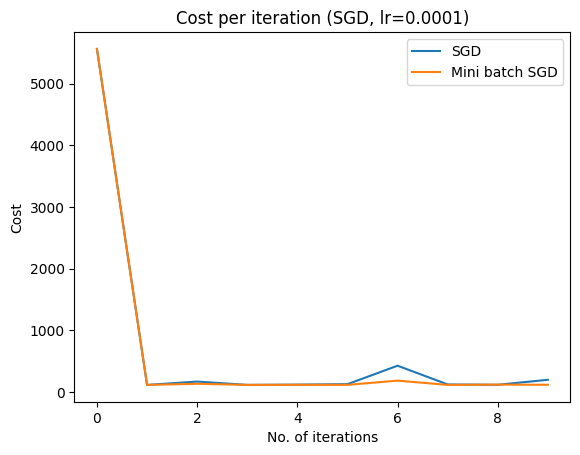

In [24]:
plt.plot(sgd_cost_graph, label="SGD")
plt.plot(msgd_cost_graph, label="Mini batch SGD")
plt.legend()
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration (SGD, lr=0.0001)')
plt.show()

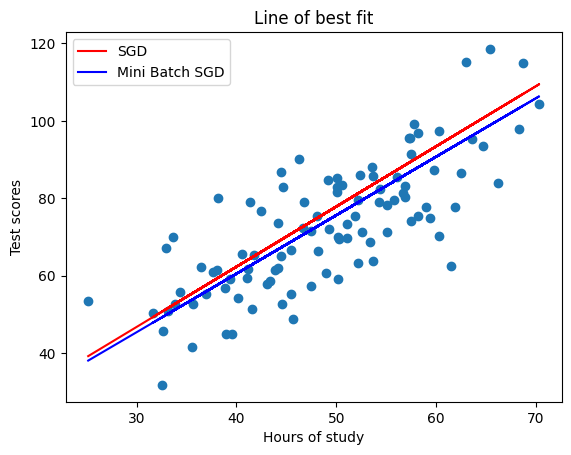

In [25]:
plt.scatter(x, y)
#Predict y values
sgd_pred = sgd_m * x + sgd_b
msgd_pred = msgd_m * x + msgd_b
#Plot predictions as line of best fit
plt.plot(x, sgd_pred, c='r', label="SGD")
plt.plot(x, msgd_pred, c='b', label="Mini Batch SGD")
plt.legend()
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

##Question 4:
What are the benefits of gradient descent compared to normal equation w* = ((XX^T)^-1)*(XY).

My answer:

1. Gradient descent (gd) works well with large number of features while normal equation works well with small number of features, as gd is more computationally efficient.
2. Gradient descent is iterative and updates the model parameters after processing the entire training dataset, while the normal equation is a closed-form (and exact)solution that directly computes optimal parameters with no iteration.

## Question 5:
Explain the difference between PCA and Linear Regression using examples on a plot.

In [34]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

#xfit = np.linspace(0, 10, 1000)
yfit = model.predict(x[:, np.newaxis])

In [37]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(points)

print(pca.components_)
print(pca.explained_variance_)

[[ 0.45402951  0.89098665]
 [ 0.89098665 -0.45402951]]
[341.50884814  30.97826888]


In [39]:
# dimension reduction
pca = PCA(n_components=1)
pca.fit(points)
X_pca = pca.transform(points)
print("original shape:   ", points.shape)
print("transformed shape:", X_pca.shape)

original shape:    (100, 2)
transformed shape: (100, 1)


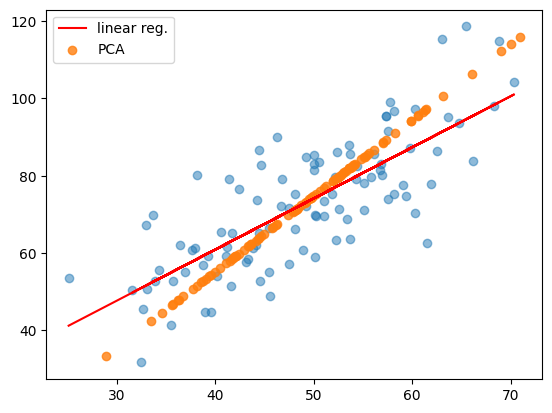

In [45]:
# original points
plt.scatter(x, y, alpha=0.5)
# linear regression plot
plt.plot(x, yfit, c='r', label="linear reg.")
# pca plot
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, label="PCA")

plt.legend()

**In words:**

Linear regression models the r/s between 2 variables and creates a best fit line according to the points given, to predict other values.

PCA reduces the dimensions of the points given, and can begin with many dimensions, not just 2.

There are many more differences, but I believe this is the fundamental difference.


**More:**

Linear regression
- supervised learning technique
- model the relationship between a dependent variable and one or more independent variables -> best-fit line (r/s)
- predict the value of the dependent variable based on the value of the independent variable.

PCA
- unsupervised learning technique
- dimensionality reduction -> transform the original variables into a new set of variables (principal components, uncorrelated)
- capture the maximum variance in the data.
- for 2 variables, PCA can be used to find the direction in which the data varies the most and represents it as the first principal component.

In summary, Linear regression is used to model the relationship between variables and make predictions, while PCA is used for dimensionality reduction and capturing the most important patterns in the data.

With PCA, the error squares are minimized perpendicular to the straight line, so it is an orthogonal regression. In linear regression, the error squares are minimized in the y-direction.